In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats



# Generate Synthetic Data for X1 and X2 (correlated heavy tailed rv's)

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate correlated random variables (Gaussian copula in latent space)
num_samples = 1000
mean = [0, 0]  # Mean of multivariate normal
cov = [[1, 0.8], [0.8, 1]]  # Covariance matrix for positive correlation
z = np.random.multivariate_normal(mean, cov, size=num_samples)
z1 = z[:, 0]
z2 = z[:, 1]

# Map to uniform
u1 = stats.norm.cdf(z1)
u2 = stats.norm.cdf(z2)

# Map to marginals
x1 = stats.expon.ppf(u1, scale=1)  # Exponential distribution
x2 = stats.t.ppf(u2, df=3)  # Student's t-distribution

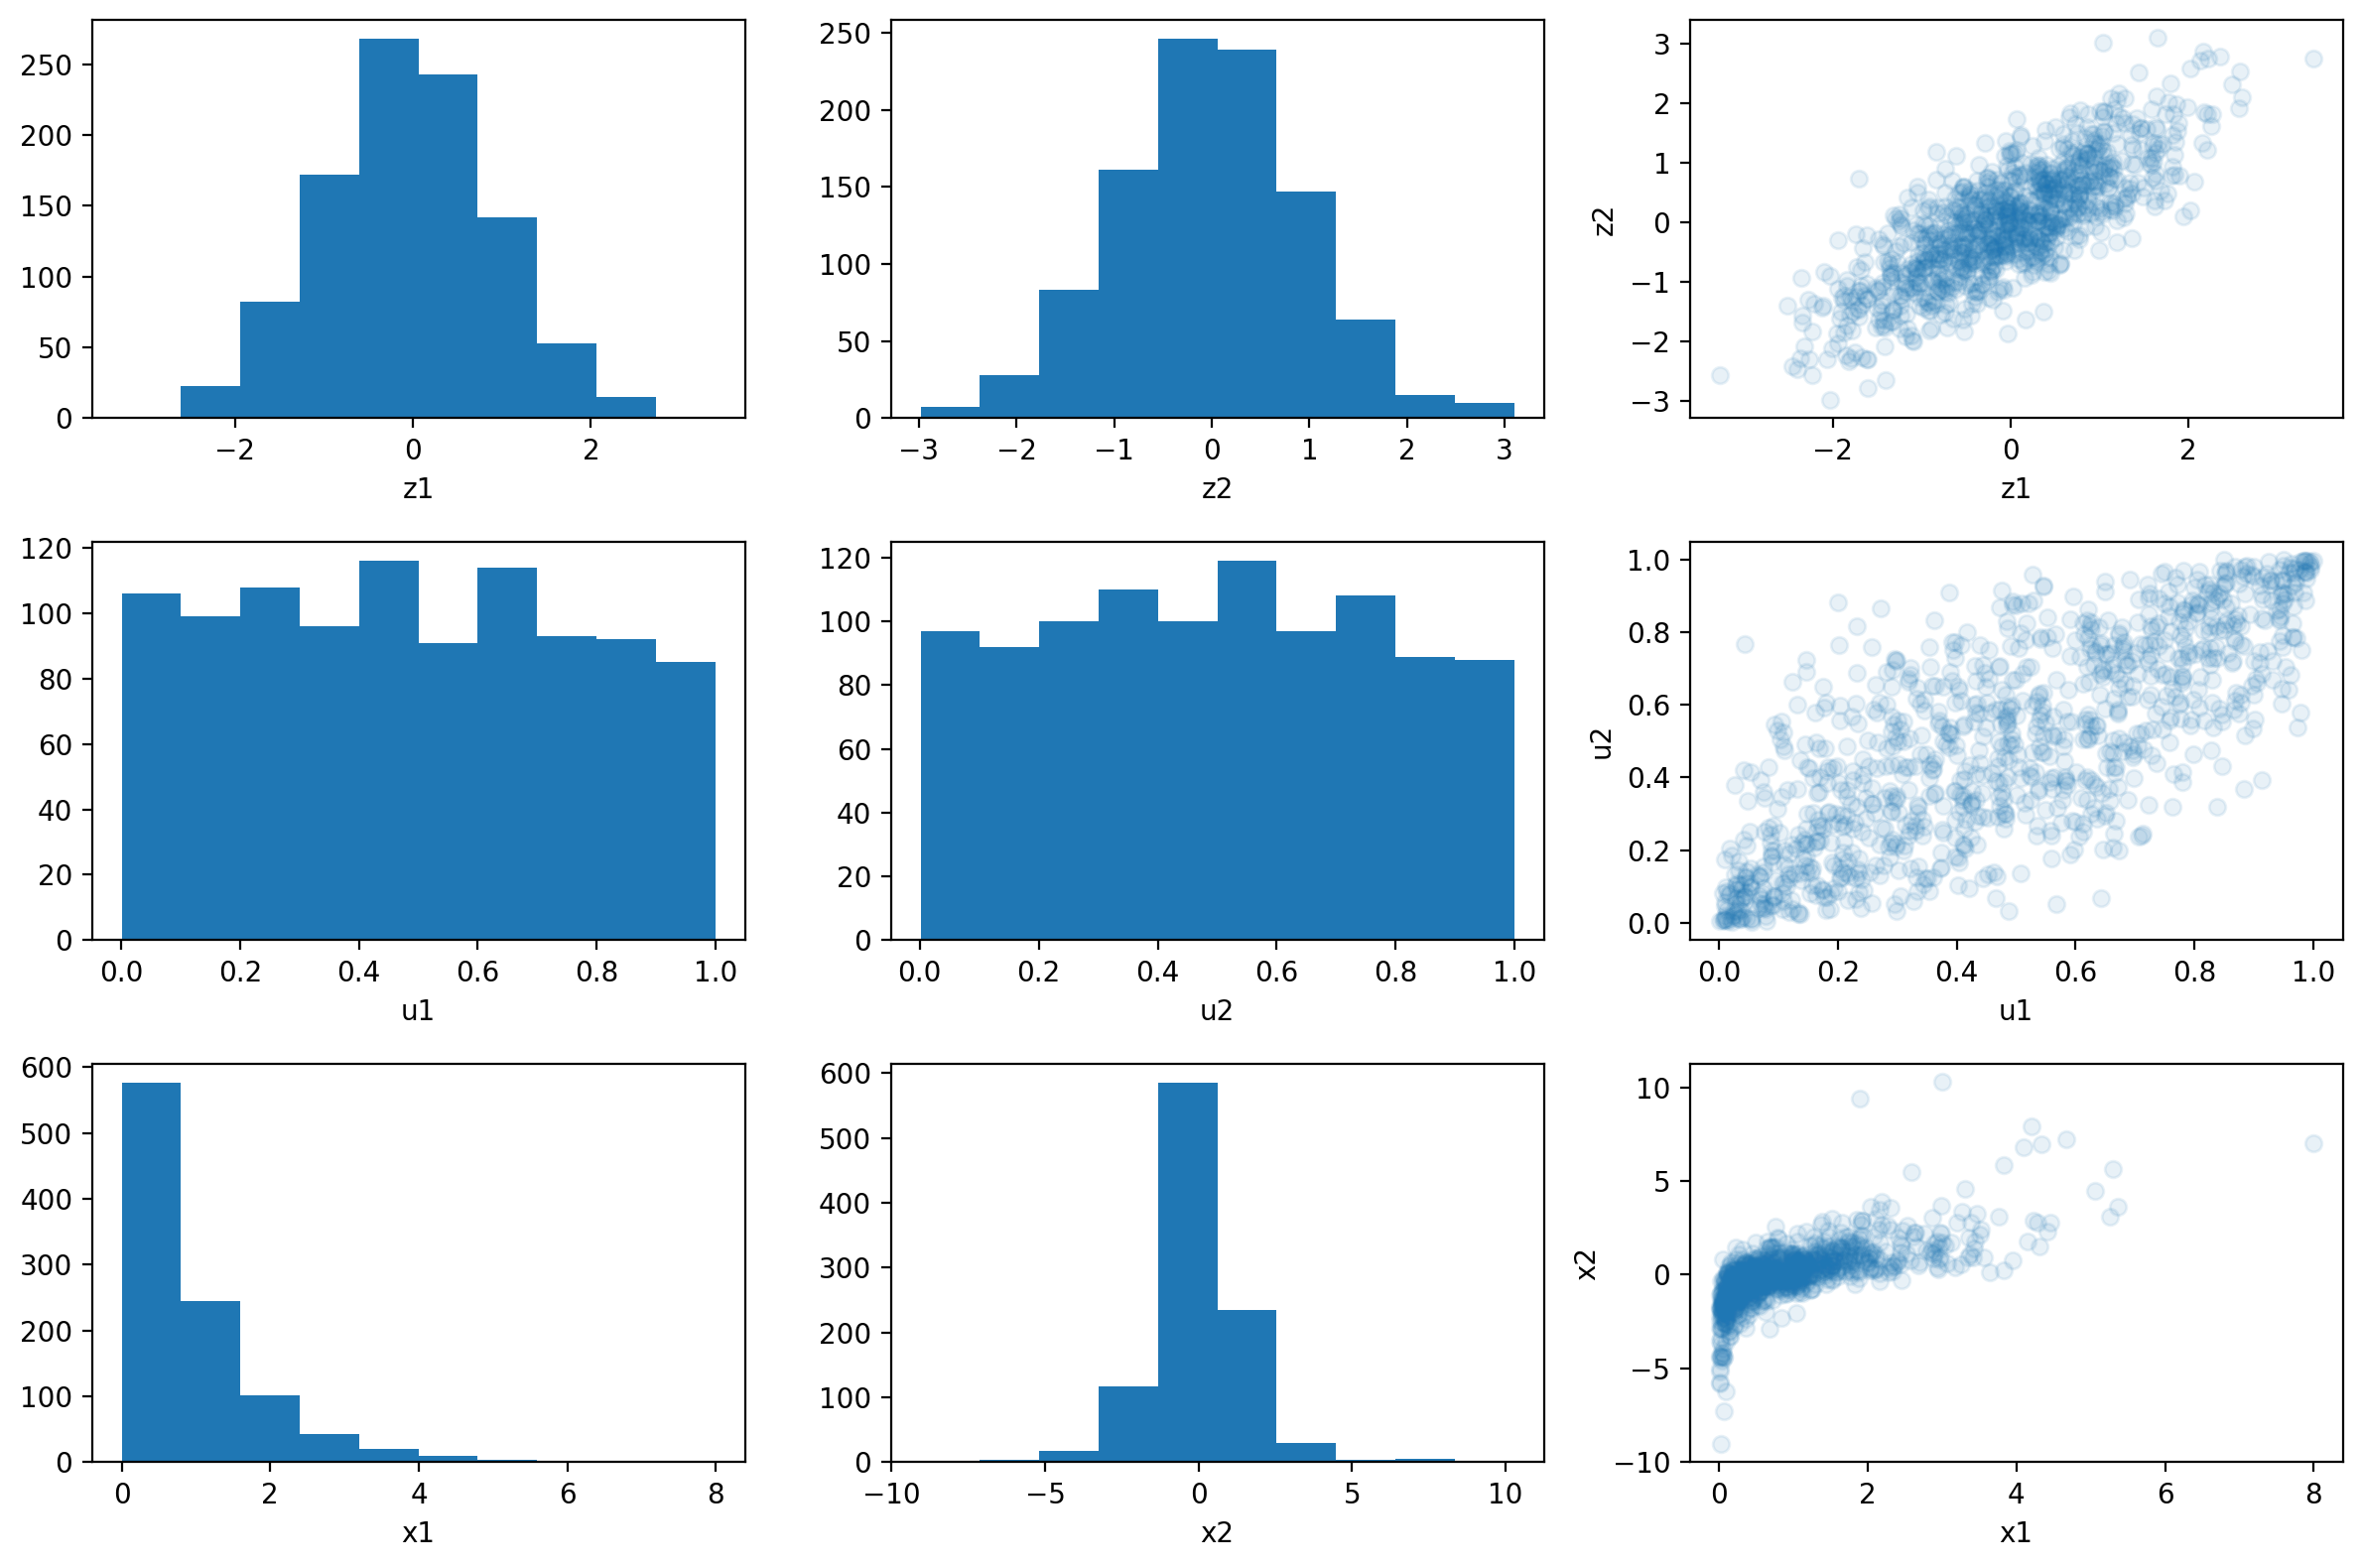

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

axs[0,0].hist(z1)
axs[0,0].set_xlabel('z1')
axs[0,1].hist(z2)
axs[0,1].set_xlabel('z2')
axs[0,2].scatter(z1, z2, alpha=0.1)
axs[0,2].set_xlabel('z1')
axs[0,2].set_ylabel('z2')

axs[1,0].hist(u1)
axs[1,0].set_xlabel('u1')
axs[1,1].hist(u2)
axs[1,1].set_xlabel('u2')
axs[1,2].scatter(u1, u2, alpha=0.1)
axs[1,2].set_xlabel('u1')
axs[1,2].set_ylabel('u2')

axs[2,0].hist(x1)
axs[2,0].set_xlabel('x1')
axs[2,1].hist(x2)
axs[2,1].set_xlabel('x2')
axs[2,2].scatter(x1, x2, alpha=0.1)
axs[2,2].set_xlabel('x1')
axs[2,2].set_ylabel('x2')

plt.tight_layout()

# Transform to uniform marginals

In [6]:
from scipy.stats import rankdata

# Transform to uniform marginals
u1p = rankdata(x1) / (num_samples + 1)  # Scale ranks to (0, 1)
u2p = rankdata(x2) / (num_samples + 1)

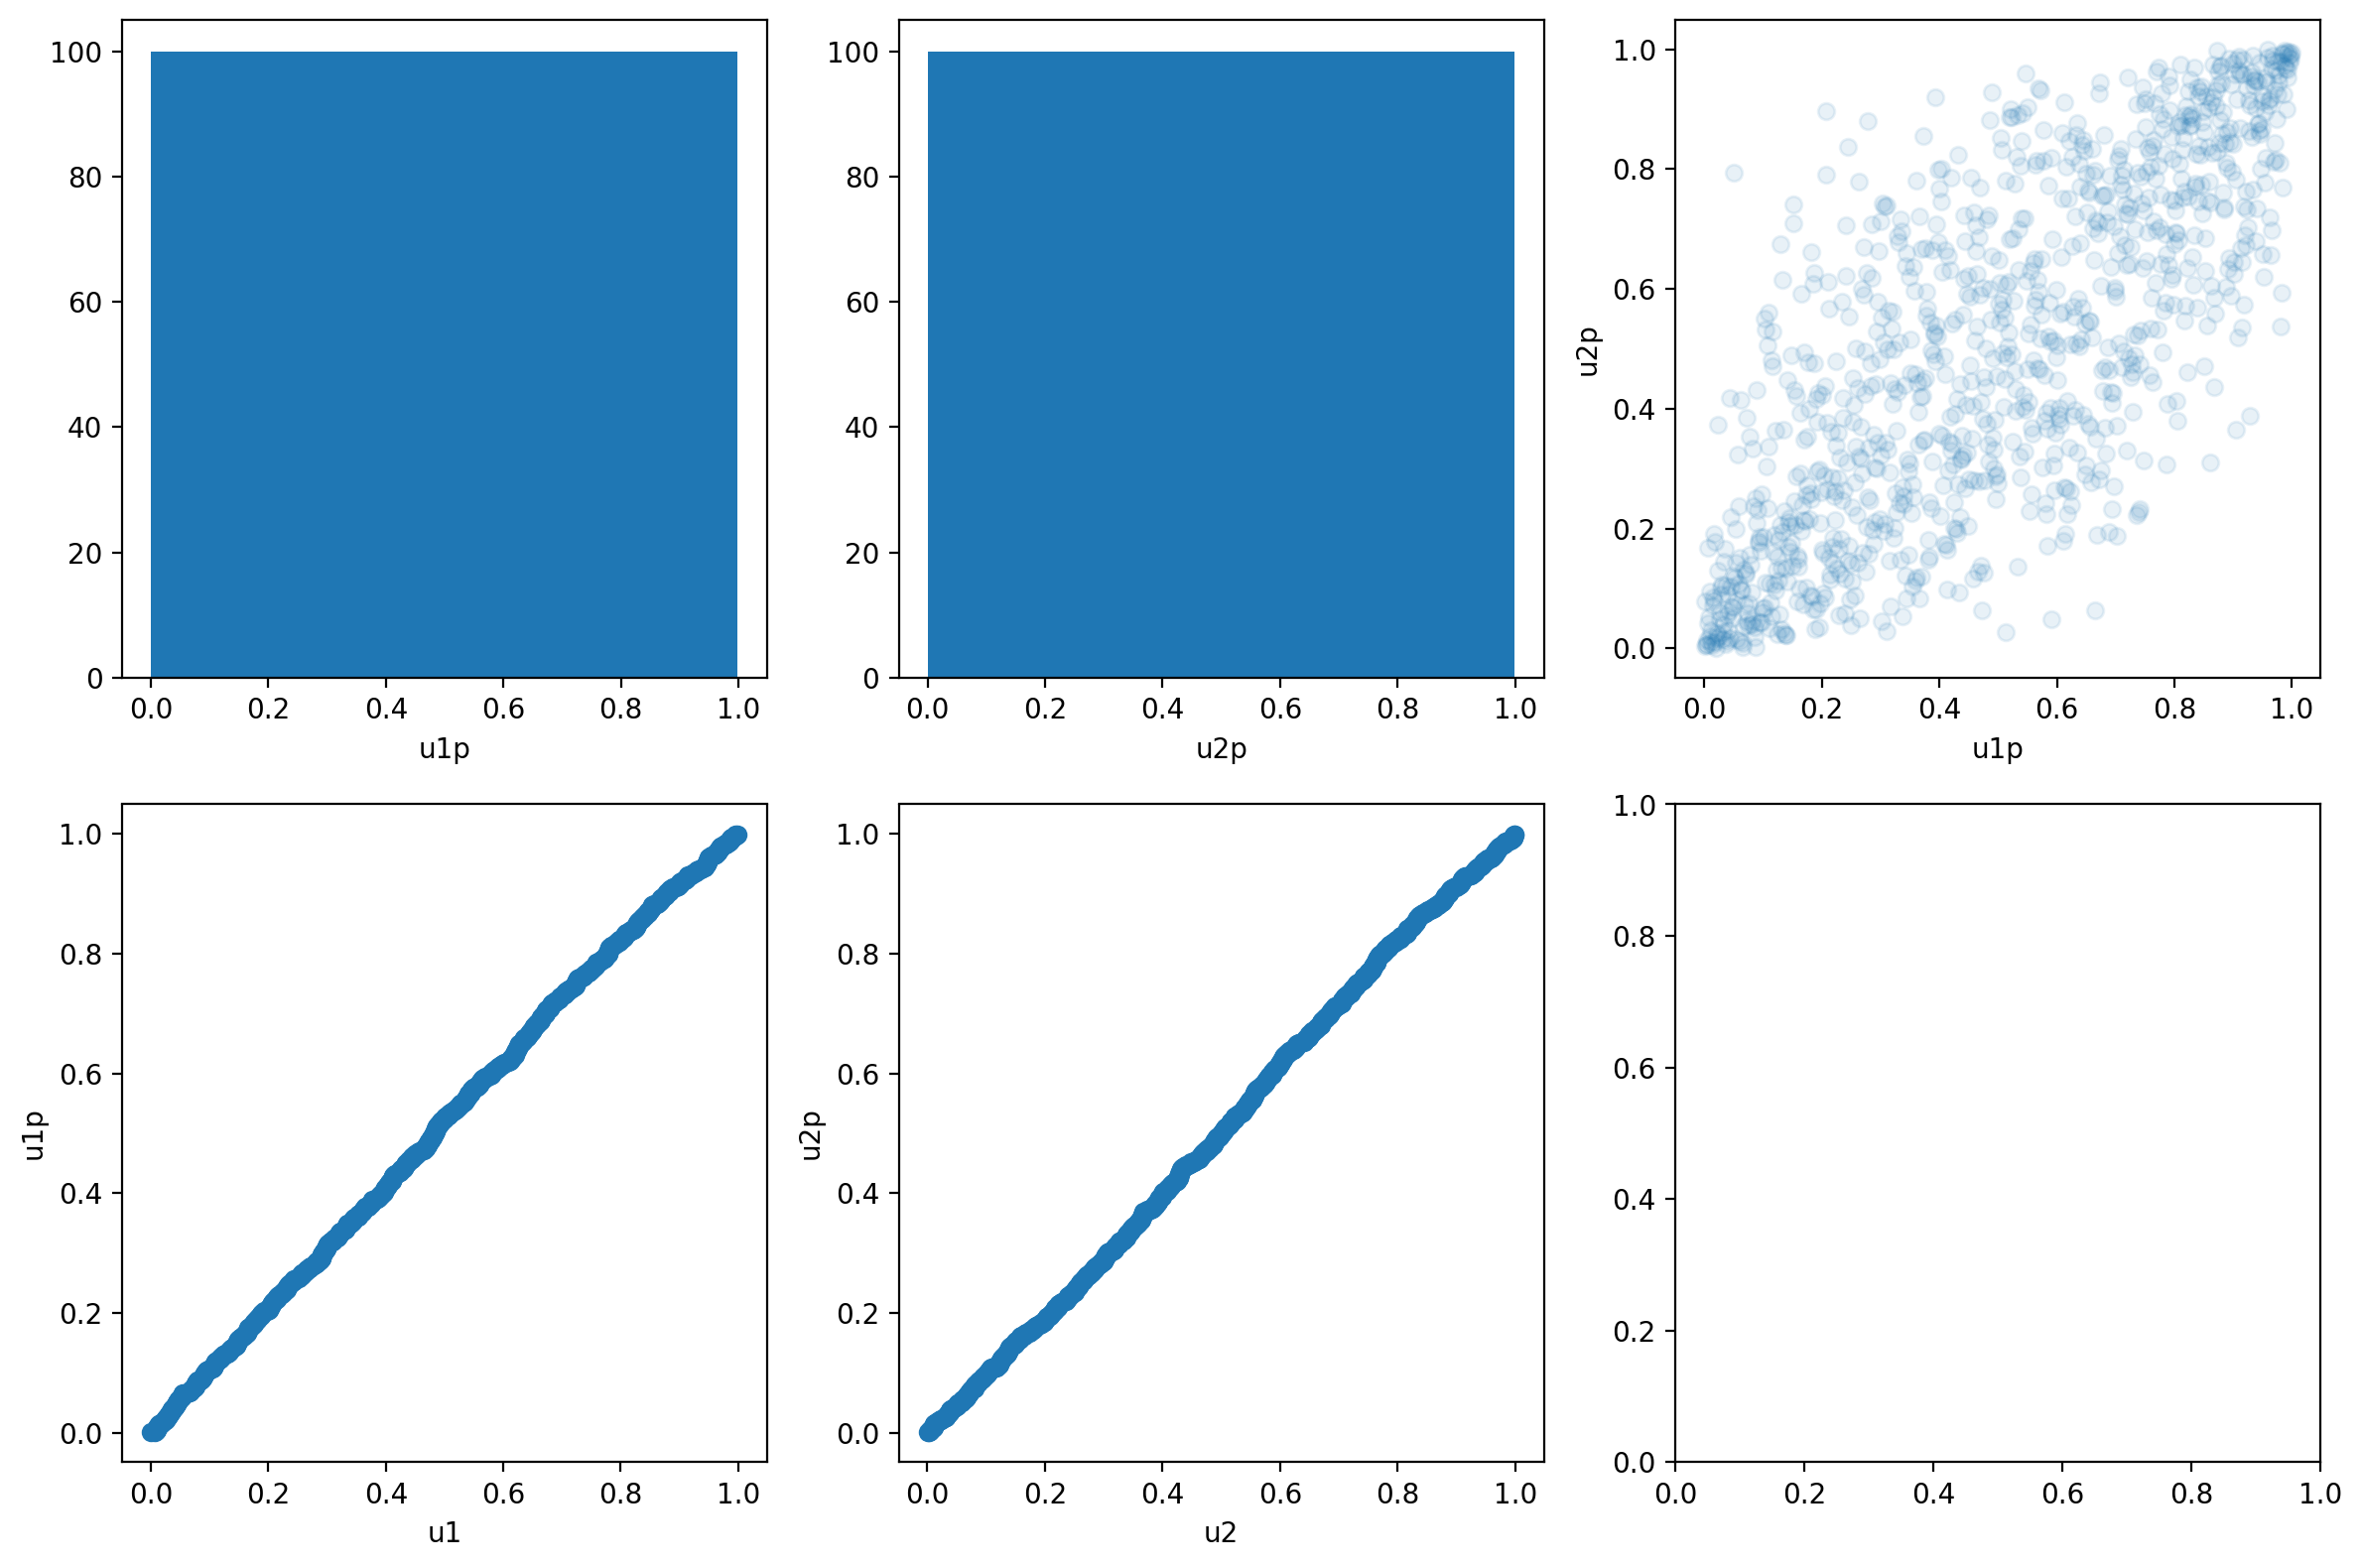

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0,0].hist(u1p)
axs[0,0].set_xlabel('u1p')
axs[0,1].hist(u2p)
axs[0,1].set_xlabel('u2p')
axs[0,2].scatter(u1p, u2p, alpha=0.1)
axs[0,2].set_xlabel('u1p')
axs[0,2].set_ylabel('u2p')

axs[1,0].scatter(u1, u1p)
axs[1,0].set_xlabel('u1')
axs[1,0].set_ylabel('u1p')
axs[1,1].scatter(u2, u2p)
axs[1,1].set_xlabel('u2')
axs[1,1].set_ylabel('u2p')


plt.tight_layout()

# Fit a gaussian copula
Because we know the data generating process, should have the same correlations that were present in the start (0.8)

In [8]:
from scipy.stats import norm

# Fit a Gaussian copula by estimating the correlation matrix
copula_corr = np.corrcoef(norm.ppf(u1), norm.ppf(u2))

print("Estimated Copula Correlation Matrix:")
print(copula_corr)

Estimated Copula Correlation Matrix:
[[1.         0.77970323]
 [0.77970323 1.        ]]


# Generate new samples

In [9]:
new_z = np.random.multivariate_normal([0, 0], copula_corr, size=num_samples)
new_z1 = new_z[:, 0]
new_z2 = new_z[:, 1]

new_u1 = stats.norm.cdf(new_z1)  # Map to uniform
new_u2 = stats.norm.cdf(new_z2)

# Map back to original marginals
new_x1 = stats.expon.ppf(new_u1, scale=1)
new_x2 = stats.t.ppf(new_u2, df=3)

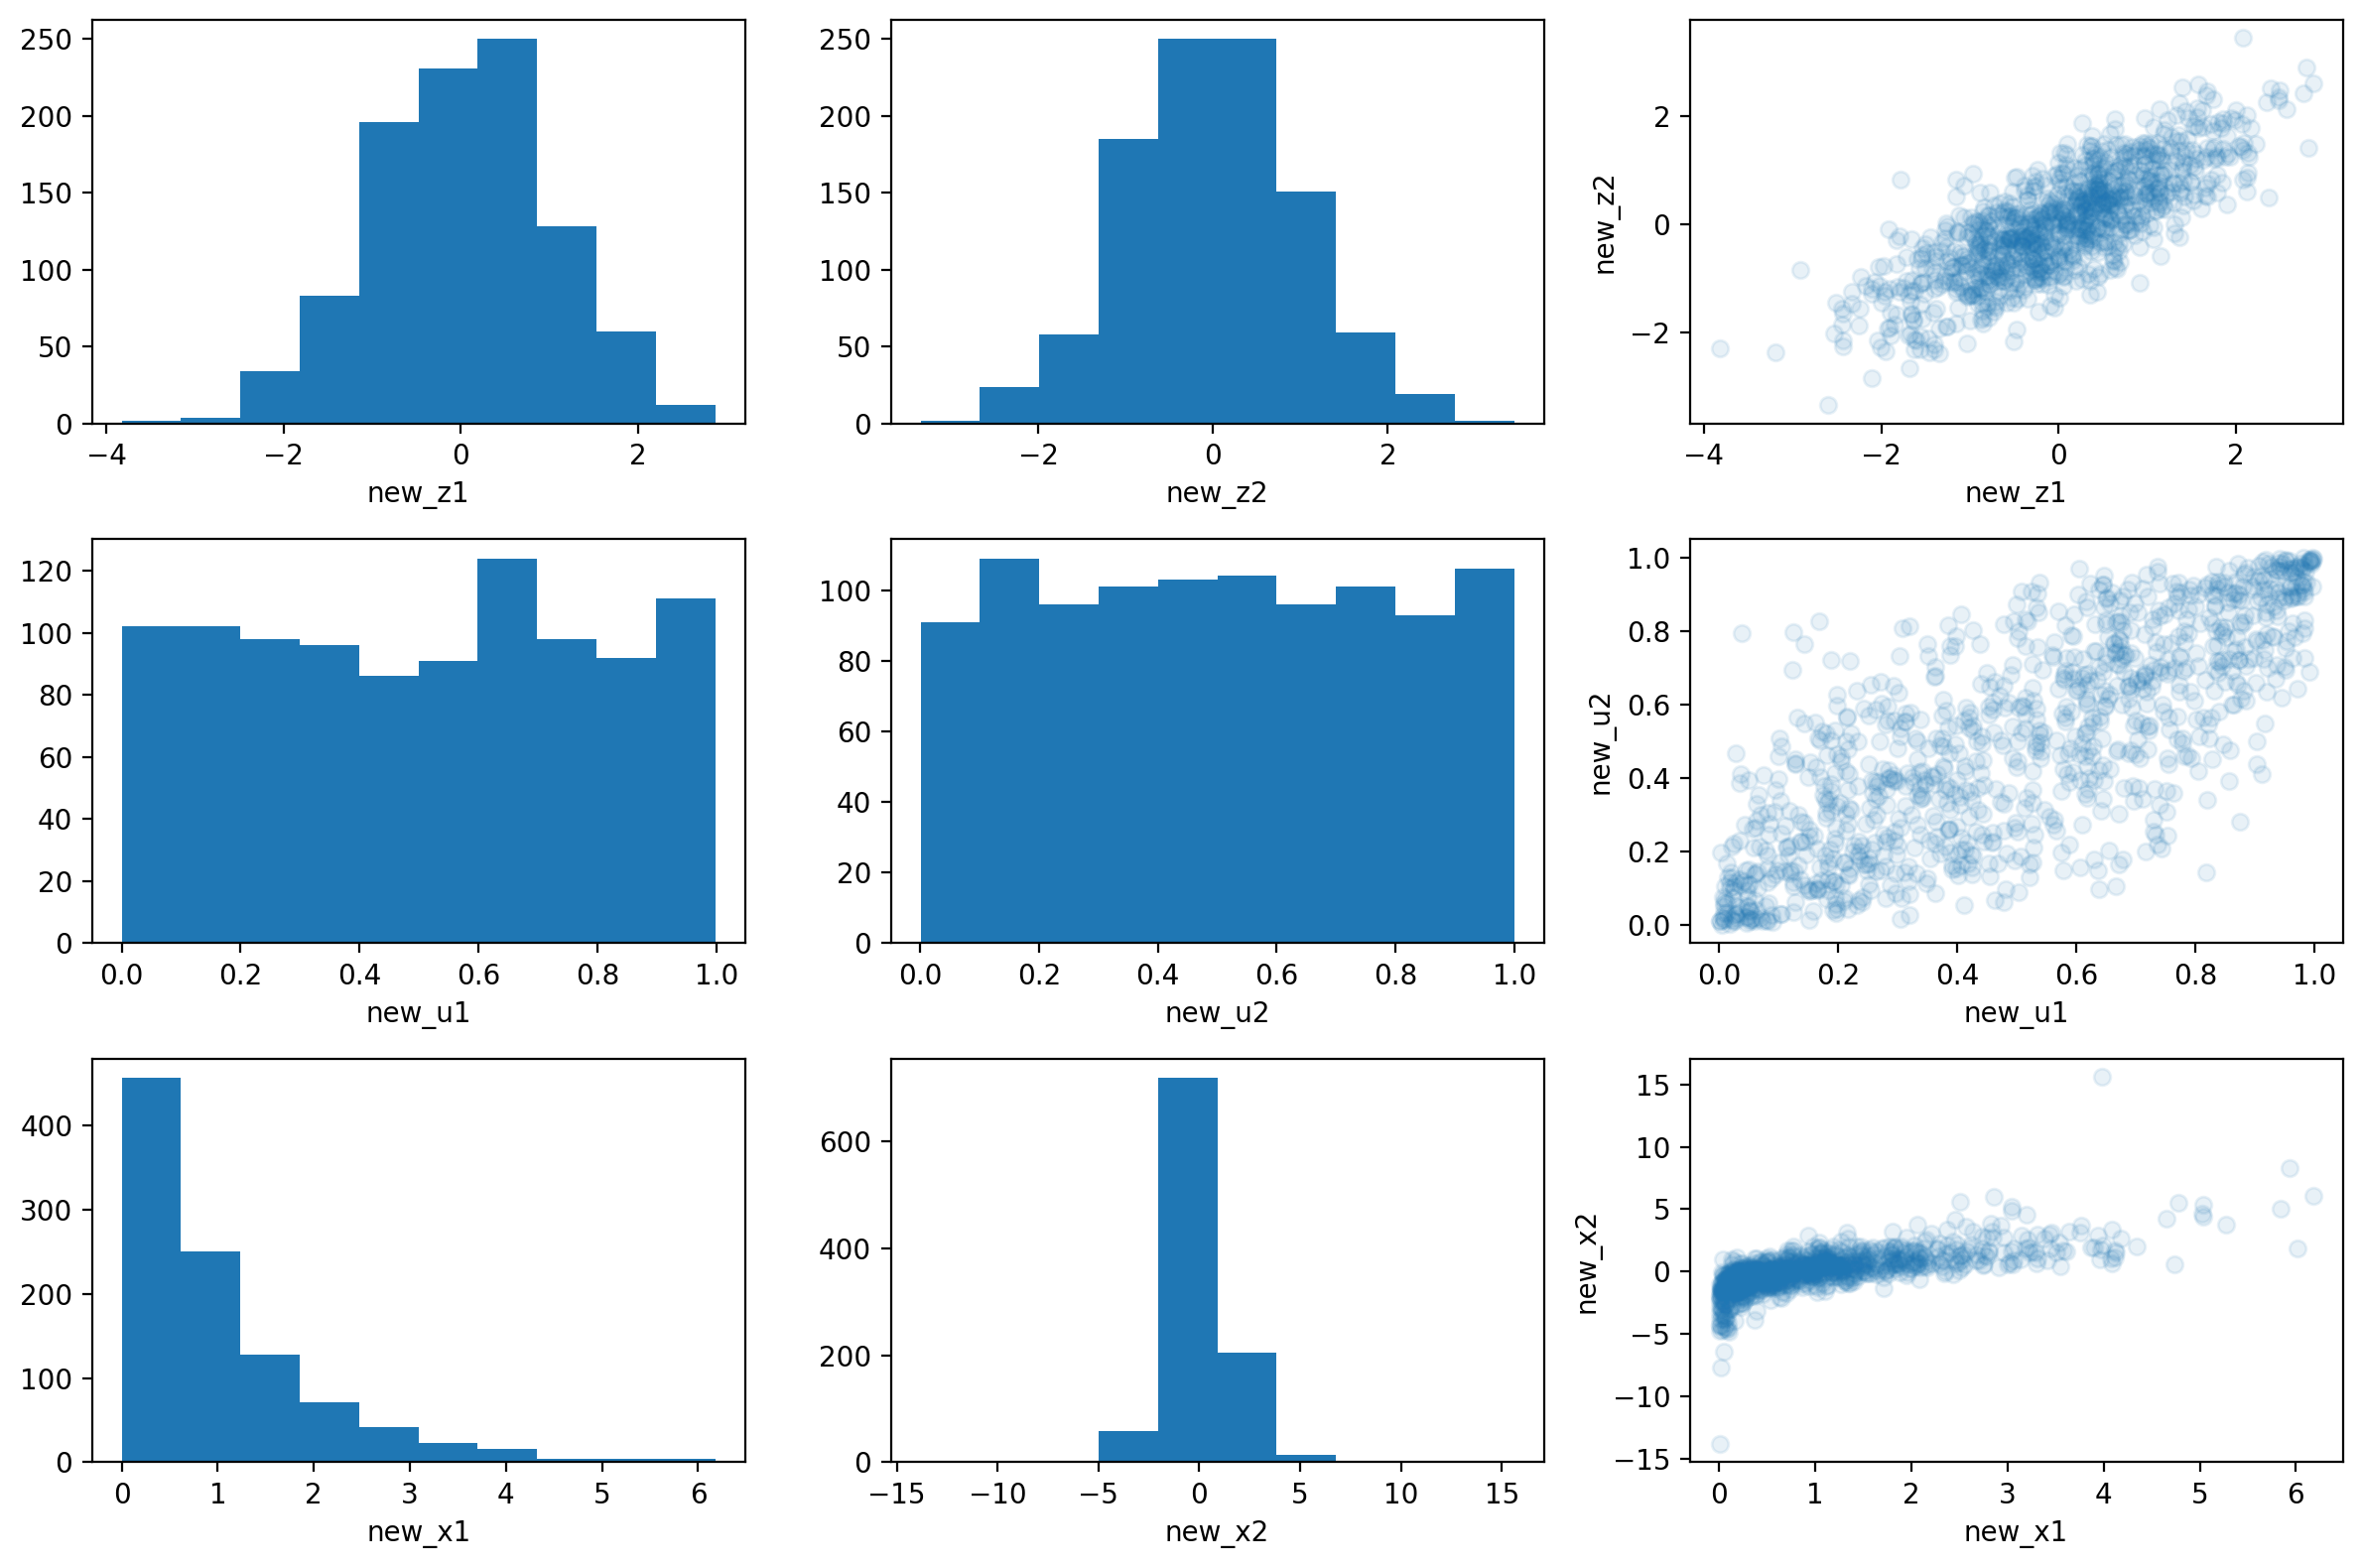

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(12, 8))

axs[0,0].hist(new_z1)
axs[0,0].set_xlabel('new_z1')
axs[0,1].hist(new_z2)
axs[0,1].set_xlabel('new_z2')
axs[0,2].scatter(new_z1, new_z2, alpha=0.1)
axs[0,2].set_xlabel('new_z1')
axs[0,2].set_ylabel('new_z2')

axs[1,0].hist(new_u1)
axs[1,0].set_xlabel('new_u1')
axs[1,1].hist(new_u2)
axs[1,1].set_xlabel('new_u2')
axs[1,2].scatter(new_u1, new_u2, alpha=0.1)
axs[1,2].set_xlabel('new_u1')
axs[1,2].set_ylabel('new_u2')

axs[2,0].hist(new_x1)
axs[2,0].set_xlabel('new_x1')
axs[2,1].hist(new_x2)
axs[2,1].set_xlabel('new_x2')
axs[2,2].scatter(new_x1, new_x2, alpha=0.1)
axs[2,2].set_xlabel('new_x1')
axs[2,2].set_ylabel('new_x2')

plt.tight_layout()